# Data Augmentation cat - dog

In [8]:
#imprt paskages
import os 
import zipfile

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import layers#

In [9]:
# Extract the archive
zip_ref = zipfile.ZipFile("data/cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [10]:
# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [11]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [12]:
# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
def create_model():
    '''Creates a CNN with 4 convolutional layers'''
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    
    model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
    return model

In [14]:
# All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                                        train_dir, # This is the source directory for training images
                                        target_size=(150,150),# All images will be resized to 150x150
                                        batch_size=20,
                                        class_mode="binary")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = create_model()


In [17]:
# Constant for epochs
EPOCHS = 20

In [20]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=50,# 100        # 2000 images = batch_size * steps
      epochs=EPOCHS-10, #20
      validation_data=validation_generator,
      validation_steps=5, #50         # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/10
50/50 - 33s - loss: 0.6989 - accuracy: 0.4990 - val_loss: 0.6912 - val_accuracy: 0.5000 - 33s/epoch - 658ms/step
Epoch 2/10
50/50 - 28s - loss: 0.6864 - accuracy: 0.5780 - val_loss: 0.6940 - val_accuracy: 0.5200 - 28s/epoch - 564ms/step
Epoch 3/10
50/50 - 30s - loss: 0.6743 - accuracy: 0.5820 - val_loss: 0.6983 - val_accuracy: 0.4800 - 30s/epoch - 595ms/step
Epoch 4/10
50/50 - 29s - loss: 0.6538 - accuracy: 0.6280 - val_loss: 0.6623 - val_accuracy: 0.6300 - 29s/epoch - 587ms/step
Epoch 5/10
50/50 - 27s - loss: 0.6386 - accuracy: 0.6440 - val_loss: 0.6642 - val_accuracy: 0.5700 - 27s/epoch - 545ms/step
Epoch 6/10
50/50 - 28s - loss: 0.6062 - accuracy: 0.6710 - val_loss: 0.6380 - val_accuracy: 0.5700 - 28s/epoch - 567ms/step
Epoch 7/10
50/50 - 29s - loss: 0.5951 - accuracy: 0.6910 - val_loss: 0.6067 - val_accuracy: 0.7000 - 29s/epoch - 574ms/step
Epoch 8/10
50/50 - 31s - loss: 0.5592 - accuracy: 0.7210 - val_loss: 0.5472 - val_accuracy: 0.7400 - 31s/epoch - 611ms/step
Epoch 9/

In [21]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

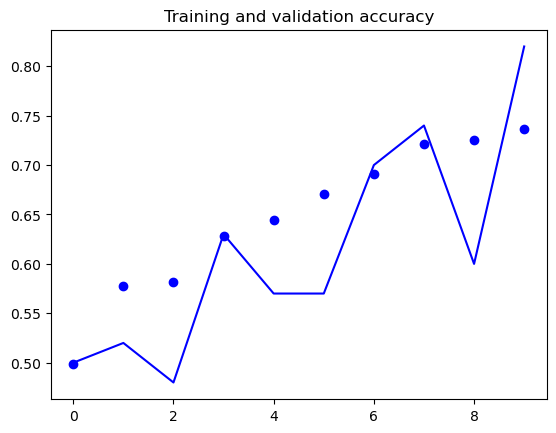

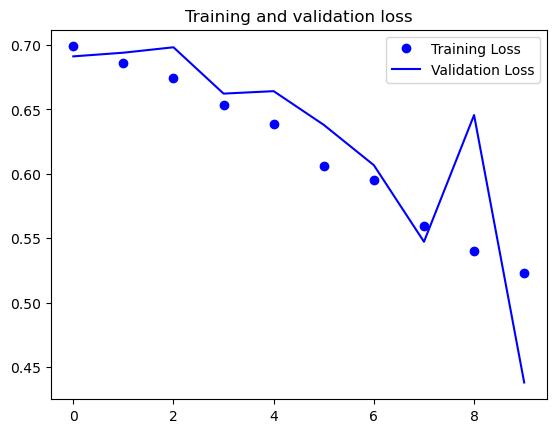

In [22]:
# Plot training results
plot_loss_acc(history)

From the results above, you'll see the training accuracy is more than 90%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't.

### Data augmentation

One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the ImageDataGenerator which you have been using to rescale the image. There are other properties on it that you can use to augment the image.

Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of train_datagen has been updated to use the parameters described above.



In [23]:
# Create new model
model_for_aug = create_model()

In [42]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2 , 
    height_shift_range=0.2,
    shear_range=0.2,  
     zoom_range=0.2,
      horizontal_flip=True,
    fill_mode='nearest'
           )

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 63s - loss: 0.6901 - accuracy: 0.5325 - val_loss: 0.7284 - val_accuracy: 0.5000 - 63s/epoch - 631ms/step
Epoch 2/20
100/100 - 67s - loss: 0.6800 - accuracy: 0.5665 - val_loss: 0.6505 - val_accuracy: 0.6500 - 67s/epoch - 673ms/step
Epoch 3/20
100/100 - 61s - loss: 0.6649 - accuracy: 0.5910 - val_loss: 0.6261 - val_accuracy: 0.6560 - 61s/epoch - 614ms/step
Epoch 4/20
100/100 - 67s - loss: 0.6454 - accuracy: 0.6285 - val_loss: 0.6237 - val_accuracy: 0.6210 - 67s/epoch - 675ms/step
Epoch 5/20
100/100 - 60s - loss: 0.6338 - accuracy: 0.6360 - val_loss: 0.5778 - val_accuracy: 0.7030 - 60s/epoch - 604ms/step
Epoch 6/20
100/100 - 61s - loss: 0.6179 - accuracy: 0.6550 - val_loss: 0.5745 - val_accuracy: 0.6860 - 61s/epoch - 614ms/step
Epoch 7/20
100/100 - 61s - loss: 0.5910 - accuracy: 0.6730 - val_loss: 0.5900 - val_accuracy: 0.6790 - 61s/epoch - 606ms/step
Epoch 8/20
100/100 - 59s - loss: 0.5973 - accuracy: 0.6685 - val_loss: 0.5730 - val_accuracy: 0.6840 - 59s/epoch - 594

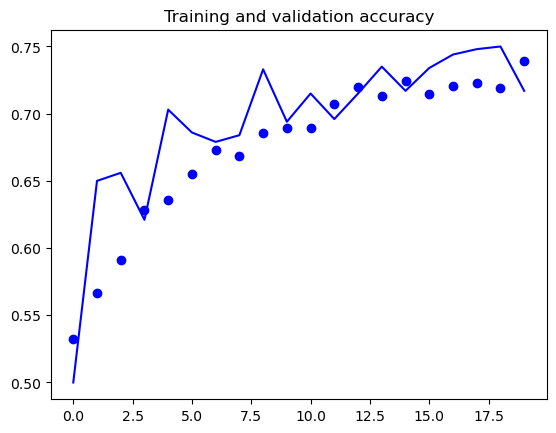

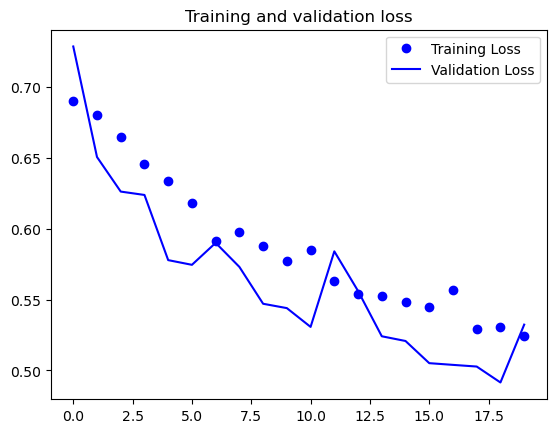

In [28]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)